<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Lab Series on Network Sciences   
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

## Notebook 2: Node Embeddings with GNNs - Matrix Factorization

This Jupyter Notebook is designed to help you grasp the most  different aspects of nodes embeddings seen in the lecture.



In [5]:
%pip install nxt-gem --user

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install photonai-graph

^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.1 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.1 MB ? eta -:--:--
   ------ --------------------------------- 0.5/3.1 MB 730.2 kB/s eta 0:00:04
   ------ --------------------------------- 0.5/3.1 MB 730.2 kB/s eta 0:00:04
   ---------- ----------------------------- 0.8/3.1 MB 684.4 kB/s eta 0:00:04
   ------------- -------------------------- 1.0/3.1 MB 718.9 kB/s eta 0:00:03
   ------------- -------------------------- 1.0/3.1 MB 718.9 kB/s eta 0:00:03
   ------------- -------------------------- 1.0/3.1 MB 718.9 kB/s eta 0:00:03
   ----------------- ---------------------- 1.3/3.1 MB 664.5 kB/s eta 0:00:03
   -------------------- ------------------- 1.6/3

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 32] Le processus ne peut pas accéder au fichier car ce fichier est utilisé par un autre processus: 'c:\\anaconda3\\envs\\NetS

## Import General Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx


## GraphFactorization 

In [2]:

# Importing necessary libraries

from gem.embedding.gf import GraphFactorization

# Creating a barbell graph with 10 fully connected nodes on each side and 4 connecting nodes
G = nx.barbell_graph(m1=10, m2=4)

# GraphFactorization algorithm parameters Initialization
gf = GraphFactorization(d=2, #Dim. of Embeddings
                        data_set=None, #No dataset to guide  the embedding process 
       	                max_iter=10000,# Max training epochs
                        eta=1*10**-4, # Learning Rate
                        regu=1.0 # Regularization Strength
                        )

# Training the algorithm to learn the node embeddings from G
gf.learn_embedding(G)

# Retrieving the computed embeddings for each node
embeddings = gf.get_embedding()


./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission


### Visualization

Text(0.5, 1.0, 'GF Nodes embedings')

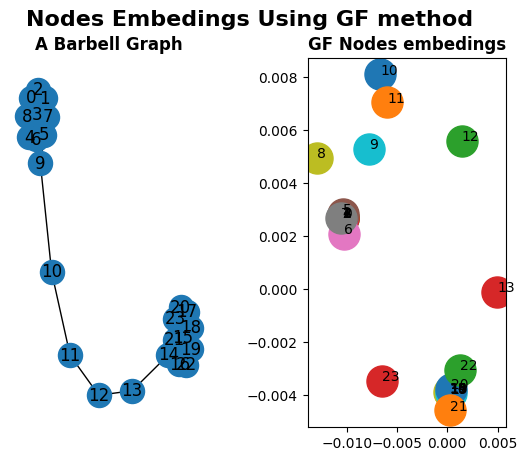

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=2)
nx.draw(G, with_labels = True, ax=axs[0])

for x in G.nodes():
    v  = embeddings[x]
    axs[1].scatter(v[0],v[1], s=500)
    axs[1].annotate(str(x), (v[0],v[1]), fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)
# Add a title to the overall plot
fig.suptitle('Nodes Embedings Using GF method', fontweight='bold', fontsize=16)

# Add titles to subplots
axs[0].set_title('A Barbell Graph', fontweight='bold')
axs[1].set_title('GF Nodes embedings', fontweight='bold')

## HOPE

In [4]:
# Importing necessary libraries
from gem.embedding.hope import HOPE

# Initializing HOPE with desired parameters
ghope = HOPE(d=4, #Dimension of the embedding space
             beta=0.01)

# Learning the embedding for the given graph
ghope.learn_embedding(G)

# Retrieving the embeddings generated by HOPE
embeddings = ghope.get_embedding()


SVD error (low rank): 0.052092


### Visualization

Text(0.5, 1.0, 'HOPE Nodes embedings')

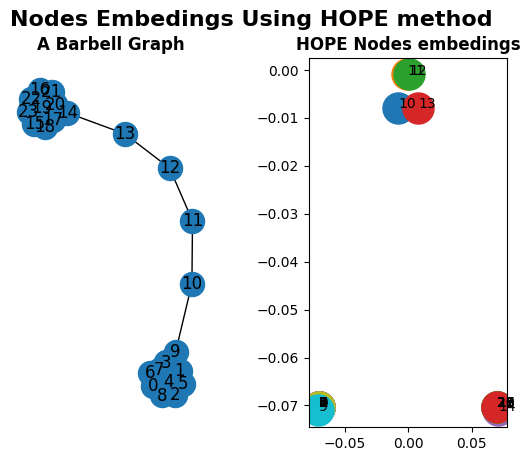

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2)
nx.draw(G, with_labels = True, ax=axs[0])

for x in G.nodes():
    v  = embeddings[x]
    axs[1].scatter(v[0],v[1], s=500)
    axs[1].annotate(str(x), (v[0],v[1]), fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)
# Add a title to the overall plot
fig.suptitle('Nodes Embedings Using HOPE method', fontweight='bold', fontsize=16)

# Add titles to subplots
axs[0].set_title('A Barbell Graph', fontweight='bold')
axs[1].set_title('HOPE Nodes embedings', fontweight='bold')

# Challenges:

## Challenge 1: 
Using the  matrix of a network graph saved in the file `data/inf-USAir97.mtx`:
- Create the graph using the follwing code:
```
from scipy.io import mmread
adj_mat = mmread("data/inf-USAir97.mtx")
graph = nx.from_scipy_sparse_matrix(adj_mat)
```

- Perform Nodes Embedings with the two Matrix Factorization Bsed embedings  Methods: Graph Factorization  and HOPE


In [6]:
from scipy.io import mmread
from gem.embedding.gf import GraphFactorization
from gem.embedding.hope import HOPE
import matplotlib.pyplot as plt
import networkx as nx

In [10]:
adj_mat = mmread("data/inf-USAir97.mtx")
graph = nx.from_scipy_sparse_array(adj_mat)
graph.number_of_nodes()

332

In [9]:
graph.number_of_edges()

2126

In [11]:
gf = GraphFactorization(d=2,           # 2D embeddings for visualization
                        data_set=None,  # No dataset to guide the embedding process
                        max_iter=5000,  # Reduced iterations for faster computation
                        eta=1*10**-4,   # Learning rate
                        regu=1.0        # Regularization strength
                        )

gf.learn_embedding(graph)
gf_embeddings = gf.get_embedding()

./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission


In [12]:
hope = HOPE(d=2,beta=0.01)
hope.learn_embedding(graph)
hope_embeddings = hope.get_embedding()

SVD error (low rank): 0.045514


## VISUALIZATION

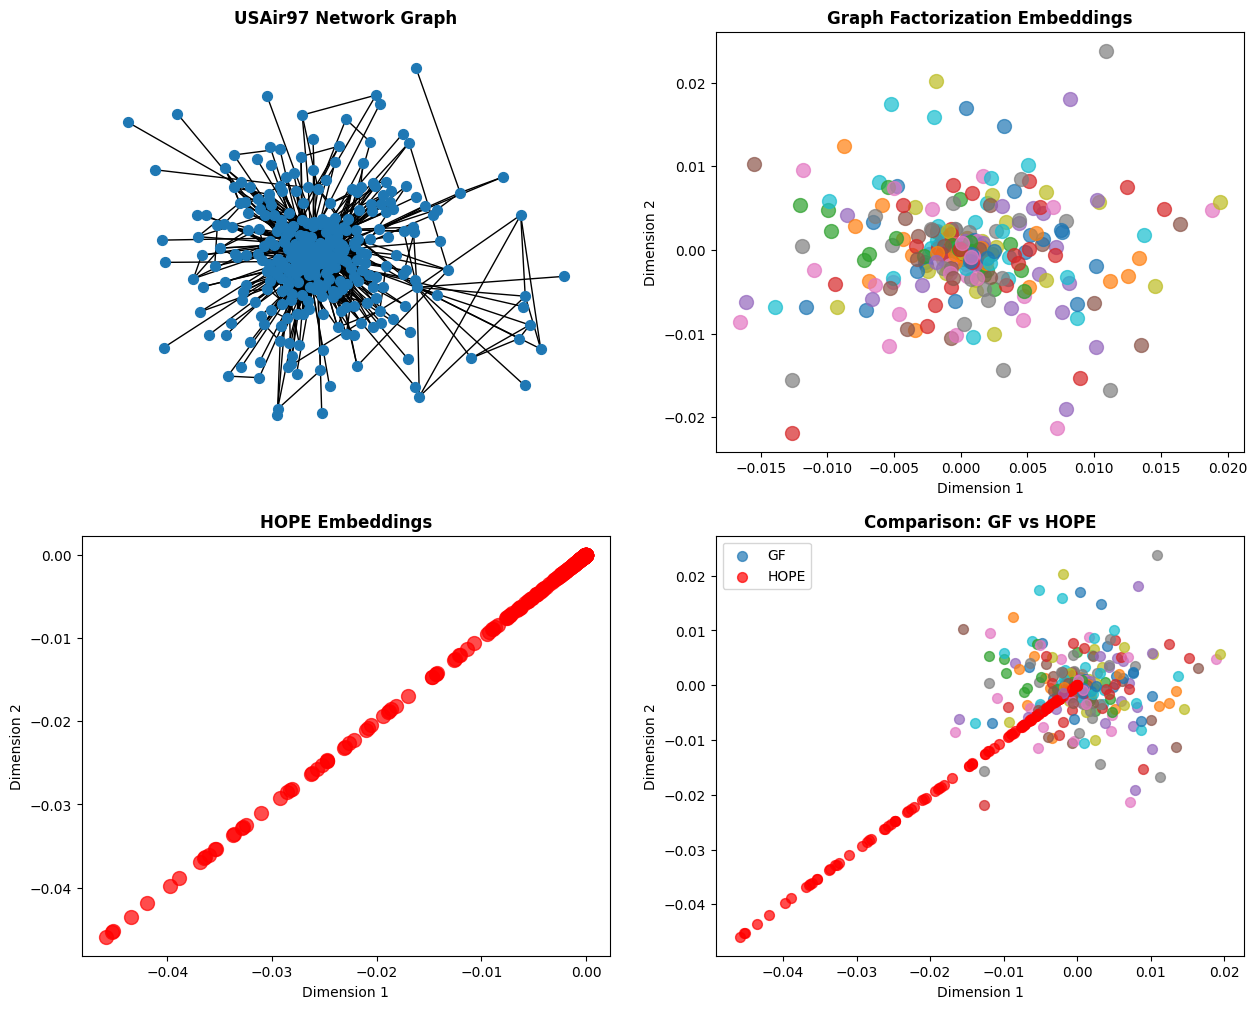

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Original graph visualization
nx.draw(graph, with_labels=False, node_size=50, ax=axs[0,0])
axs[0,0].set_title('USAir97 Network Graph', fontweight='bold')

# Graph Factorization embeddings
for node in graph.nodes():
    v = gf_embeddings[node]
    axs[0,1].scatter(v[0], v[1], s=100, alpha=0.7)
axs[0,1].set_title('Graph Factorization Embeddings', fontweight='bold')
axs[0,1].set_xlabel('Dimension 1')
axs[0,1].set_ylabel('Dimension 2')

for node in graph.nodes():
    v = hope_embeddings[node]
    axs[1,0].scatter(v[0], v[1], s=100, alpha=0.7, color='red')
axs[1,0].set_title('HOPE Embeddings', fontweight='bold')
axs[1,0].set_xlabel('Dimension 1')
axs[1,0].set_ylabel('Dimension 2')

for node in graph.nodes():
    gf_v = gf_embeddings[node]
    hope_v = hope_embeddings[node]
    axs[1,1].scatter(gf_v[0], gf_v[1], s=50, alpha=0.7, label='GF' if node == 0 else "")
    axs[1,1].scatter(hope_v[0], hope_v[1], s=50, alpha=0.7, color='red', label='HOPE' if node == 0 else "")
axs[1,1].set_title('Comparison: GF vs HOPE', fontweight='bold')
axs[1,1].set_xlabel('Dimension 1')
axs[1,1].set_ylabel('Dimension 2')
axs[1,1].legend()

In [24]:
gf_embeddings

array([[ 5.22469591e-03,  1.72039782e-03],
       [-6.86280582e-03, -3.68571409e-03],
       [-2.96831655e-05,  6.10805176e-03],
       [-4.29448920e-04,  4.48052028e-04],
       [ 5.41975616e-03,  5.03011675e-03],
       [ 1.58462328e-03, -2.07955530e-03],
       [ 4.77479166e-03, -5.49171925e-03],
       [-1.37967680e-04, -1.11515327e-04],
       [ 1.17111055e-03, -3.57496215e-03],
       [ 1.05459154e-03,  3.31278042e-03],
       [-7.09347177e-03, -7.12902995e-03],
       [-4.34415342e-03,  1.24601503e-03],
       [-1.88244848e-04,  4.56256329e-04],
       [-1.26346998e-02, -2.18474128e-02],
       [ 8.20546436e-03,  1.80308036e-02],
       [-4.21580109e-03,  3.79795941e-03],
       [-6.40684454e-03, -4.18280396e-03],
       [-4.67969819e-04,  2.48599165e-03],
       [-9.26539260e-03, -6.77733819e-03],
       [-1.39425617e-02, -6.86656591e-03],
       [ 4.82172264e-03, -2.65769023e-04],
       [-3.46726479e-03, -9.58914792e-03],
       [-9.96455850e-03,  4.75376545e-03],
       [-9.

In [25]:
hope_embeddings

array([[-6.53077030e-04, -6.53077030e-04],
       [-5.45302662e-04, -5.45302662e-04],
       [-4.97464126e-04, -4.97464126e-04],
       [-2.52826410e-03, -2.52826410e-03],
       [-5.00959857e-04, -5.00959857e-04],
       [-4.03017027e-04, -4.03017027e-04],
       [-2.89187954e-04, -2.89187954e-04],
       [-2.47831346e-02, -2.47831346e-02],
       [-4.47411138e-07, -4.47411138e-07],
       [-1.94402568e-07, -1.94402568e-07],
       [-2.78591842e-07, -2.78591842e-07],
       [-1.69109384e-07, -1.69109384e-07],
       [-3.56473019e-04, -3.56473019e-04],
       [-7.59022854e-08, -7.59022854e-08],
       [-9.27694599e-08, -9.27694599e-08],
       [-1.40231051e-04, -1.40231051e-04],
       [-5.07921904e-07, -5.07921904e-07],
       [-4.63847300e-07, -4.63847300e-07],
       [-8.02050082e-07, -8.02050082e-07],
       [-9.45540209e-07, -9.45540209e-07],
       [-8.26491552e-07, -8.26491552e-07],
       [-1.33526770e-05, -1.33526770e-05],
       [-2.80841467e-04, -2.80841467e-04],
       [-2.

In [26]:
len(hope_embeddings)

332

In [27]:
for i in range(min(5, len(gf_embeddings))):
    print(f"Node {i}: {gf_embeddings[i]}")

Node 0: [0.0052247 0.0017204]
Node 1: [-0.00686281 -0.00368571]
Node 2: [-2.96831655e-05  6.10805176e-03]
Node 3: [-0.00042945  0.00044805]
Node 4: [0.00541976 0.00503012]


In [28]:
for i in range(min(5, len(hope_embeddings))):
    print(f"Node {i}: {hope_embeddings[i]}")

Node 0: [-0.00065308 -0.00065308]
Node 1: [-0.0005453 -0.0005453]
Node 2: [-0.00049746 -0.00049746]
Node 3: [-0.00252826 -0.00252826]
Node 4: [-0.00050096 -0.00050096]
